In [2]:

import numpy as np
import pandas as pd
import librosa
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score
import random


In [3]:
import random
with open("openmic-2018/partitions/split01_train.csv") as f:
    train_files_full = [x.strip() for x in f.readlines()]
with open("openmic-2018/partitions/split01_test.csv") as f:
    test_files_full = [x.strip() for x in f.readlines()]

# small_train = random.sample(train_files_full, 100)
# small_test = random.sample(test_files_full, 50)

#with open("openmic-2018/partitions/small_train.csv", "w") as f:
    #for item in small_train:
        #f.write(f"{item}\n")

#with open("openmic-2018/partitions/small_test.csv", "w") as f:
    #for item in small_test:
        #f.write(f"{item}\n")

#print("Created small_train.csv and small_test.csv!")
with open("openmic-2018/partitions/train.csv", "w") as f:
    for item in train_files_full:
        f.write(f"{item}\n")

with open("openmic-2018/partitions/test.csv", "w") as f:
    for item in test_files_full:
        f.write(f"{item}\n")

print("Created train.csv and test.csv!")

Created train.csv and test.csv!


In [4]:
with open("openmic-2018/partitions/train.csv") as f:
    train_files = [x.strip() for x in f.readlines()]
with open("openmic-2018/partitions/test.csv") as f:
    test_files = [x.strip() for x in f.readlines()]
print(f"Loaded {len(train_files)} training files and {len(test_files)} test files.")

Loaded 14915 training files and 5085 test files.


In [ ]:
X_list = []
valid_files = []

for i, file in enumerate(train_files + test_files):
    try:
        path = f"openmic-2018/audio/{file[:3]}/{file}.ogg"
        y, sr = librosa.load(path, sr=None)
        D = np.abs(librosa.stft(y))
        D = D.flatten() 
        X_list.append(D)
        valid_files.append(file)
        if i % 50 == 0:
            print(f"Processed {i} files")
    except Exception as e:
        print(f"Error with {file}: {e}")

Processed 0 files
Processed 50 files
Processed 100 files
Processed 150 files
Processed 200 files
Processed 250 files
Processed 300 files
Processed 350 files
Processed 400 files
Processed 450 files
Processed 500 files
Processed 550 files
Processed 600 files
Processed 650 files
Processed 700 files
Processed 750 files
Processed 800 files
Processed 850 files
Processed 900 files
Processed 950 files
Processed 1000 files
Processed 1050 files
Processed 1100 files
Processed 1150 files
Processed 1200 files
Processed 1250 files
Processed 1300 files
Processed 1350 files
Processed 1400 files
Processed 1450 files
Processed 1500 files
Processed 1550 files
Processed 1600 files
Processed 1650 files
Processed 1700 files
Processed 1750 files
Processed 1800 files
Processed 1850 files
Processed 1900 files
Processed 1950 files
Processed 2000 files
Processed 2050 files
Processed 2100 files
Processed 2150 files
Processed 2200 files
Processed 2250 files
Processed 2300 files
Processed 2350 files
Processed 2400 

In [1]:
min_len = min(len(x) for x in X_list)
print(f"Minimum length across all features: {min_len}")
X = np.array([x[:min_len] for x in X_list])
print(f"Feature matrix shape before PCA: {X.shape}")

NameError: name 'X_list' is not defined

In [ ]:
n_components = min(500, X.shape[0], X.shape[1])
pca = PCA(n_components=n_components)
X_pca = pca.fit_transform(X)

print(f"Feature matrix shape after PCA: {X_pca.shape}")

Feature matrix shape after PCA: (150, 150)


In [12]:
X_train = X_pca[:len(train_files)]
X_test = X_pca[len(train_files):]

In [13]:
df1 = pd.read_csv("openmic-2018/openmic-2018-aggregated-labels.csv")
df1 = df1[df1['sample_key'].isin(valid_files)]

In [14]:
all_instruments = sorted(df1['instrument'].unique())
instrum_key = {instrum: i for i, instrum in enumerate(all_instruments)}

In [ ]:
encoded_labels = np.zeros((len(valid_files), len(all_instruments)))
file_to_idx = {file: idx for idx, file in enumerate(valid_files)}

In [16]:
for _, row in df1.iterrows():
    sample_idx = file_to_idx[row['sample_key']]
    instrum_idx = instrum_key[row['instrument']]
    encoded_labels[sample_idx, instrum_idx] = 1

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
y = y[:150]  
print(f"New shape of X: {X.shape}")
print(f"New shape of y: {y.shape}")

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"Shapes - X_train: {X_train.shape}, X_test: {X_test.shape}, y_train: {y_train.shape}, y_test: {y_test.shape}")


New shape of X: (150, 441775)
New shape of y: (150,)
Shapes - X_train: (120, 441775), X_test: (30, 441775), y_train: (120,), y_test: (30,)


In [18]:
rf = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=0)
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, random_state=0)

In [19]:
print(f"Random Forest test score: {rf.score(X_test, y_test):.4f}")

Random Forest test score: 1.0000


In [24]:
from sklearn.metrics import accuracy_score, f1_score

y_pred = rf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted') 

print(f"Accuracy: {accuracy:.4f}")
print(f"F1 Score: {f1:.4f}")



Accuracy: 1.0000
F1 Score: 1.0000


Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1-Score: 1.0000


c:\Users\bear_\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:409: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


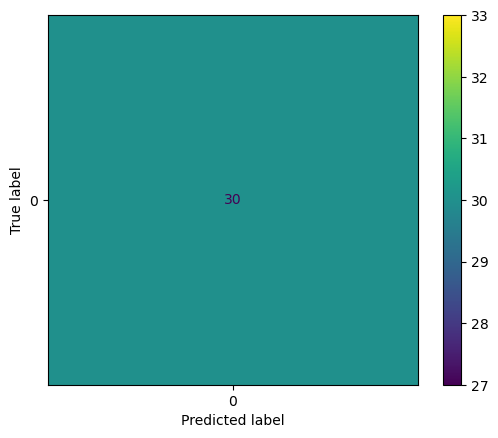

c:\Users\bear_\anaconda3\Lib\site-packages\sklearn\metrics\_ranking.py:1183: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


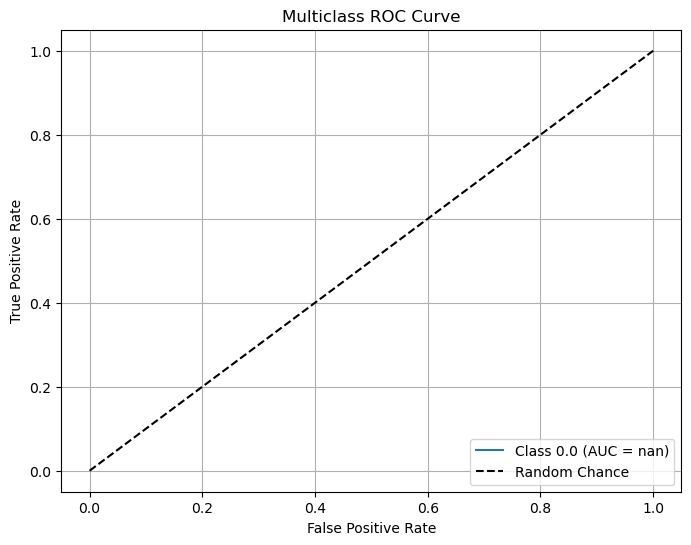

Average AUC: nan


In [ ]:
from sklearn.preprocessing import label_binarize
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay, roc_curve, RocCurveDisplay, auc
import matplotlib.pyplot as plt

rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted', zero_division=0)
recall = recall_score(y_test, y_pred, average='weighted', zero_division=0)
f1 = f1_score(y_test, y_pred, average='weighted', zero_division=0)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

y_test_bin = label_binarize(y_test, classes=rf.classes_)
n_classes = y_test_bin.shape[1]
y_prob = rf.predict_proba(X_test)

fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

plt.figure(figsize=(8,6))
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label=f'Class {rf.classes_[i]} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--', label='Random Chance')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multiclass ROC Curve')
plt.legend(loc="lower right")
plt.grid()
plt.show()

average_auc = sum(roc_auc.values()) / n_classes
print(f"Average AUC: {average_auc:.4f}")



In [26]:
print(f"Training set size: {len(X_train)}")
print(f"Testing set size: {len(X_test)}")

Training set size: 120
Testing set size: 30
